# Two coupled harmonic oscillators

## Dynamics of a single harmonic oscillator
First let us solve the Equation of motion(EOM) for one oscillator.

Let us define the parameter $x_1$ as the displacement of the mass from the equilibrium.
Then the EOM can be written as: 

$$F = -k x_1 = m \ddot x_1$$

This equation is solved in general by $ x_1(t) = A \cos(\omega t +\phi_0)$ , where $\omega = \sqrt{k/m}$ and $\phi_0$ is a phase.
For simplicity let us set $\phi_0=0$. This choice is the same as the statement: The mass is at rest at $t=0$. The solution is then simply given by:  

$$x_1(t) = A \cos(\omega t)$$

To see at this trivial level how the dynamics is affected by the parameters k and m let us plot the dynamics.

In [1]:
import math 
import numpy as np 
import matplotlib.pyplot as plt

def x1 (t,B,k,m):    #define time dependence with parameter time t, amplitude B, k and mass m
    A = B*np.cos(math.sqrt(k/m)*t)
    return A;

In [2]:
#set the parameters
dt= 0.1
t = np.arange(0,40,dt) #set the time parameter in steps dt
k=1    #set the parameter k
m=1    #set the parameter m
A=1    #set the parameter A


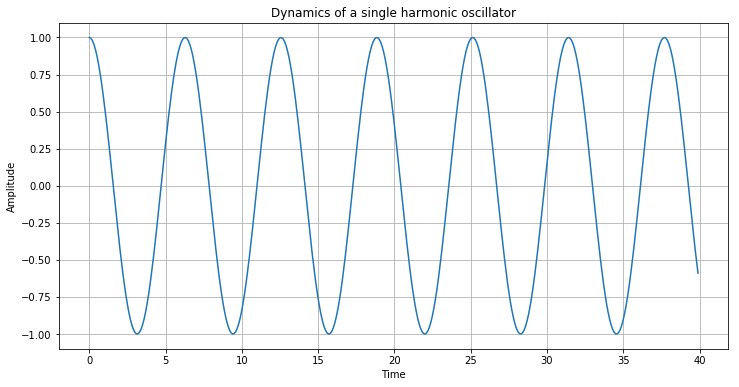

In [3]:
#plot the solution
plt.figure(figsize=(12,6))
plt.plot(t,x1(t,A,k,m))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Dynamics of a single harmonic oscillator')
plt.grid(True)

## Two coupled oscillators

Let's go to the case of two coupled harmonic oscillators. To simplify the derivations, we assume that $m_1 = m_2 = m$. but the spring constants $k_1$ and $k_2$ are different. The two oscillators are coupled through a spring with a spring constant $k_c$. The EOM for each mass is coupled to the motion of the other one and they should be solved together:

$ m \ddot x_1 = -(k_1+k_c)x_1 + k_c x_2$ 

$ m \ddot x_2 = -(k_2+k_c)x_2 + k_c x_1$

To find the eigenmodes of these coupled oscillators, we can use the anzats $x_1 = Re (A_1 e^{i\omega t})$ and $x_2 = Re (A_2 e^{i\omega t})$. The eigenfrequencies are then the answers to the following determinant being equal to zero **[Try to work this out]:**

\begin{equation*}
\begin{vmatrix}
m \omega^2 - k_1 - k_c & k_c \\
k_c & m \omega^2 - k_2 - k_c \\
\end{vmatrix} = 0
\end{equation*}

which are given by

$$ \omega^2 = \frac{1}{2m} \left( ( k_1 + k_2 + 2 k_c) \pm \sqrt{(k_1 - k_2)^2 + 4 k_c^2} \right)$$


## Normal mode splitting

It is interesting to look at the two eigenfrequencies as a function of one of the spring constants, which determines the *bare* resonance frequency **[Why is it reasonable to call that a resonance frequency?]**.


*[Sanli: plot $\omega_+$, $\omega_-$ as a function of $k_1$, allow playing with $k_c$*]

In [41]:
#define functions
def omega_plus (k1,k2,kc,m):
    omega_pl = 1/(2*m)*(k1+k2+2*kc)+np.sqrt(np.square(k1-k2)+4*np.square(kc))
    return omega_pl;
def omega_minus (k1,k2,kc,m):
    omega_mi = 1/(2*m)*(k1+k2+2*kc)-np.sqrt(np.square(k1-k2)+4*np.square(kc))
    return omega_mi;

In [69]:
#define parameters
m=1 # set the mass
mid=15 #set half the maximum of k1
dk=0.1
k1 = np.arange(0,2*mid,dk) #set the spring constant parameter in steps dk
k2=mid #set the second k2
kc =0.5 #set the coupling constant

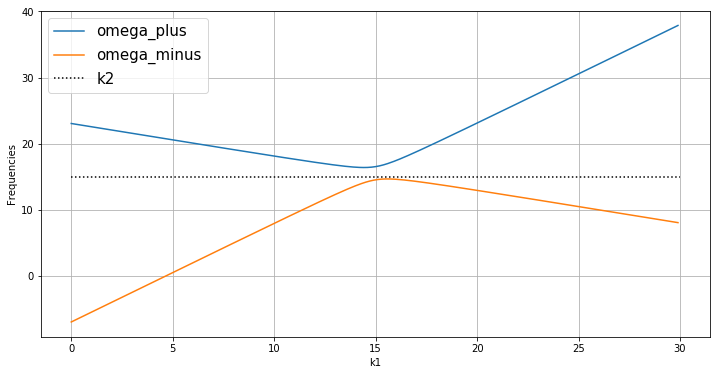

In [78]:
#plot the solution
plt.figure(figsize=(12,6))
plt.plot(k1,omega_plus(k1,k2,kc,m),label='omega_plus')
plt.plot(k1,omega_minus(k1,k2,kc,m),label='omega_minus')
plt.hlines(mid,0,2*mid,linestyles=':',label='k2')
plt.xlabel('k1')
plt.ylabel('Frequencies')
plt.legend(prop={'size': 15})
plt.grid(True)
plt.show()

In [ ]:
#define functions
def norm_mod_slow (t,B,k,m,kappa=0,s_phi=0):
    A = B*np.sin(math.sqrt((k+2*kappa)/m)*t+s_phi)
    return A;
def norm_mod_fast (t,C,k,m,kappa,f_phi=0):
    A = np.sin(math.sqrt((k+2*kappa)/m)*t+f_phi)
    return A;

## Dynamics for the special case of same spring constants

We want to see how the dynamics of the masses we started with look. For simplicity we choose $k_1=k_2$.

In [48]:
#define functions
def norm_mod_slow (t,B,k,m,kappa=0,s_phi=0):
    A = B*np.sin(math.sqrt((k+2*kappa)/m)*t+s_phi)
    return A;
def norm_mod_fast (t,C,k,m,kappa,f_phi=0):
    A = np.sin(math.sqrt((k+2*kappa)/m)*t+f_phi)
    return A;

In [52]:
# set the parameters
dt=0.1
t = np.arange(0,100,dt)
k=4
kappa=0.4
m=2
As=0.5
Af=0.5
f_phi=0
s_phi=0


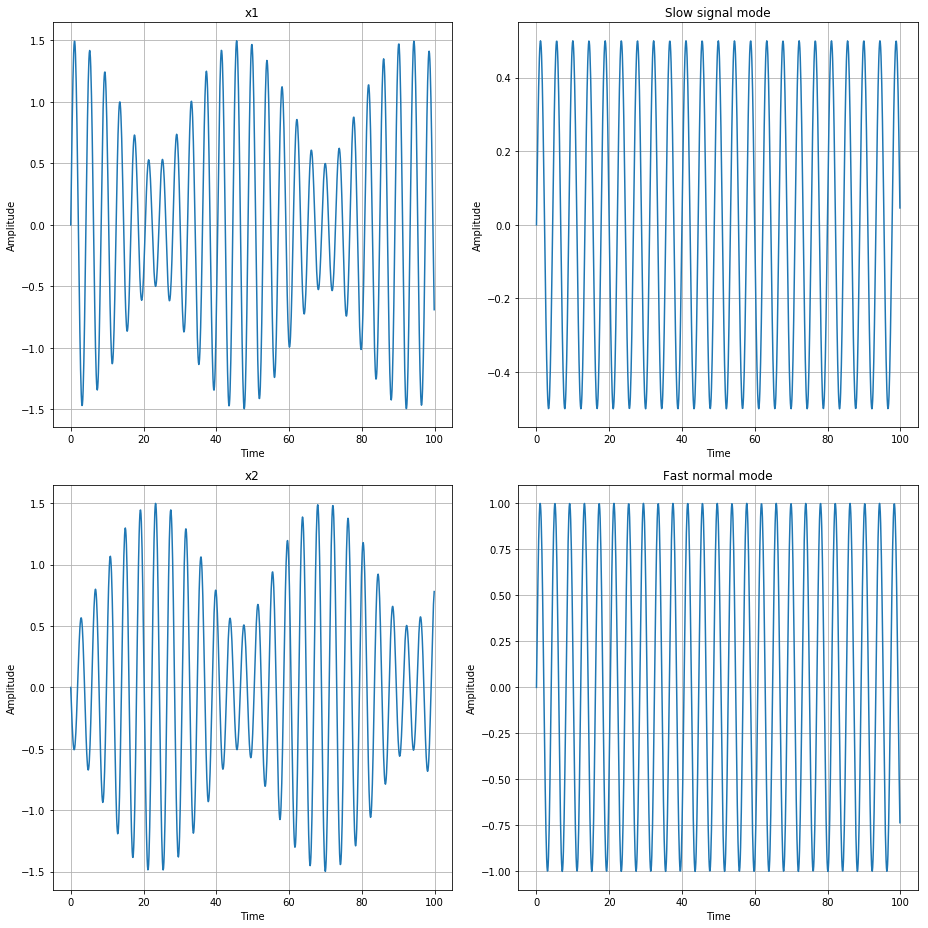

In [53]:
#do the plotting
fig, axs = plt.subplots(2, 2,figsize=(13,13))
axs[0,1].plot(t, norm_mod_slow(t,As,k,m))
axs[0,1].set_title("Slow signal mode")
axs[0,1].set_xlabel("Time")
axs[0,1].set_ylabel("Amplitude")

axs[1,1].plot(t, norm_mod_fast(t,Af,k,m,kappa))
axs[1,1].set_title("Fast normal mode")
axs[1,1].set_xlabel("Time")
axs[1,1].set_ylabel("Amplitude")

axs[0,0].plot(t, norm_mod_slow(t,As,k,m) + norm_mod_fast(t,Af,k,m,kappa))
axs[0,0].set_title("x1")
axs[0,0].set_xlabel("Time")
axs[0,0].set_ylabel("Amplitude")

axs[1,0].plot(t, norm_mod_slow(t,As,k,m) - norm_mod_fast(t,Af,k,m,kappa))
axs[1,0].set_title("x2")
axs[1,0].set_xlabel("Time")
axs[1,0].set_ylabel("Amplitude")
fig.tight_layout()
axs[0,0].grid(True)
axs[1,0].grid(True)
axs[0,1].grid(True)
axs[1,1].grid(True)
plt.show()